In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df_full = pd.read_json('grid_search_results_beta_list.json')
df_full_2 = pd.read_json('grid_search_results_beta_list2.json')
df_full_3 = pd.read_json('grid_search_results_beta_list3.json')
df_full_4 = pd.read_json('grid_search_results_beta_list4.json')

df_all = pd.concat([df_full, df_full_2, df_full_3, df_full_4], ignore_index=True)

df_all = pd.read_json('grid_search_results_beta_list_new_LR.json')

# drop columns with beta < 1
#df = df[df['beta'] >= 1.1]
#df = df[df['T'] >= 0.11]

df_all['variance'] = df_full['accuracies'].apply(lambda lst: np.var(lst))

#average 3 dfs
#df_avg = pd.DataFrame()
#df_avg['beta'] = df_full['beta']
#df_avg['mean_accuracy'] = (df_full['mean_accuracy'] + df_full_2['mean_accuracy'] + df_full_3['mean_accuracy']) / 3
#df_avg['variance'] = (df_full['variance'] + df_full_2['variance'] + df_full_3['variance']) / 3

In [30]:
df_all.head()

,beta,T,mean_accuracy,accuracies,seconds,variance
0,2.0,1,80.145500,"[80.96815490722656, 76.9936294555664, 80.73885...",526.562942,32.559852
1,2.0,1,80.329224,"[80.50955200195312, 77.50318145751953, 81.3248...",540.539090,29.935578
2,2.0,1,80.265823,"[81.12101745605469, 77.24840545654297, 81.3757...",523.924836,23.966131
3,2.2,1,80.325531,"[81.1719741821289, 77.45223236083984, 80.86624...",525.743570,17.598289
4,2.2,1,80.054535,"[80.58599090576172, 76.91719818115234, 80.1783...",544.350223,36.687785


In [31]:
#cifar
baseline = [65.65, 64.87, 65.57, 63.85, 68.6 , 57.58, 59.34, 71.02, 58.62,
       55.14, 74.48, 59.  , 66.7 , 63.57, 55.65, 66.35, 65.83, 60.27,
       62.54, 59.26, 66.67, 62.93, 58.68, 66.61, 69.94, 64.77, 66.73,
       69.86, 69.63, 64.19, 72.18, 66.78, 65.41, 61.4 , 69.71, 61.86,
       65.01, 68.27, 66.17, 67.54, 69.7 , 64.72, 73.43, 71.87, 59.75,
       71.09, 68.02, 65.83, 64.22, 68.6 , 63.87, 61.72, 66.53, 73.21,
       69.7 , 58.87, 58.71, 59.91, 66.81, 72.78, 69.95, 71.57, 72.3 ,
       60.54, 65.83, 66.88, 58.2 , 64.11, 65.58, 65.71, 68.  , 68.61,
       57.39, 67.62, 70.43, 61.04, 60.87, 67.13, 74.02, 64.87, 64.78,
       66.08, 65.52, 73.38, 66.49, 69.85, 68.01, 69.73, 70.25, 67.53,
       63.09, 61.24, 66.8 , 62.39, 59.43, 67.64, 60.27, 59.53, 63.25,
       62.63]

#imagenette
baseline = [83.89809 , 79.05733 , 83.617836, 84.28026 , 82.29299 , 79.92357 ,
       83.49045 , 84.254776, 85.70701 , 83.28662 , 82.34395 , 77.78344 ,
       81.63057 , 82.57325 , 85.55414 , 83.64331 , 83.617836, 85.605095,
       85.73248 , 81.52866 , 87.184715, 75.41401 , 81.681526, 82.1656  ,
       84.15286 , 84.891716, 82.54777 , 83.84714 , 84.458595, 84.86624 ,
       84.15286 , 86.42038 , 83.92357 , 83.49045 , 83.23567 , 78.21656 ,
       83.00637 , 85.88535 , 82.57325 , 84.611465, 81.63057 , 84.05096 ,
       81.9363  , 80.12739 , 83.592354, 86.0637  , 86.21656 , 83.108284,
       84.178345, 84.20382 , 78.11465 , 82.92994 , 83.33758 , 82.191086,
       85.01911 , 82.62421 , 80.407646, 81.044586, 85.19745 , 81.52866 ,
       77.8344  , 81.73248 , 80.12739 , 85.1465  , 86.11465 , 83.89809 ,
       83.64331 , 85.044586, 85.57962 , 84.28026 , 85.248405, 82.318474,
       82.87898 , 80.382164, 83.36306 , 85.78344 , 80.968155, 85.63057 ,
       83.92357 , 84.15286 , 81.88535 , 85.98726 , 80.50955 , 82.318474,
       84.535034, 85.85987 , 78.14013 , 83.64331 , 80.84077 , 86.21656 ,
       85.605095, 81.88535 , 82.21656 , 84.05096 , 75.00637 , 79.974525,
       80.33121 , 86.038216, 84.382164, 79.66879 , 82.98089 , 83.92357 ,
       84.611465, 80.535034, 86.0637  , 83.69427 , 83.89809 , 83.56688 ,
       85.78344 , 83.184715, 79.94904 , 83.388535, 84.20382 , 83.28662 ,
       84.2293  , 81.681526, 78.11465 , 84.78981 , 83.33758 , 81.961784,
       83.13376 , 83.41401 , 87.15923 , 81.681526, 85.29936 , 82.751595,
       85.27389 , 77.605095, 82.675156, 86.21656 , 85.52866 , 80.458595,
       83.87261 , 80.9172  , 81.22293 , 82.49682 , 84.12739 , 84.99363 ,
       82.57325 , 81.50318 , 85.50318 , 83.79618 , 83.94904 , 85.27389 ,
       85.19745 , 84.63694 , 83.541405, 86.36943 , 84.58599 , 82.34395 ,
       82.21656 , 83.71974 , 83.94904 , 81.07006 , 80.71338 , 84.10191 ,
       84.43312 , 82.62421 , 80.86624 , 84.48408 , 80.458595, 81.70701 ,
       86.72611 , 82.26752 , 82.8535  , 82.8535  , 82.1656  , 82.70064 ,
       83.031845, 82.52229 , 83.21019 , 79.28662 , 82.21656 , 85.73248 ,
       84.9172  , 82.242035, 82.038216, 85.47771 , 81.57962 , 84.94267 ,
       81.8344  , 80.28026 , 82.8535  , 78.92994 , 84.63694 , 82.57325 ,
       84.07643 , 85.12102 , 82.242035, 84.84077 , 84.05096 , 82.1656  ,
       82.64968 , 81.09554 , 80.86624 , 83.592354, 83.51592 , 82.98089 ,
       83.28662 , 79.00637 , 82.26752 , 83.64331 , 83.108284, 82.70064 ,
       85.8344  , 80.458595, 84.178345, 81.85987 , 79.92357 , 86.01274 ,
       86.01274 , 84.      , 80.50955 , 83.84714 , 84.968155, 85.42675 ,
       79.66879 , 77.47771 , 79.7707  , 83.21019 , 84.84077 , 81.9363  ,
       81.65605 , 80.20382 , 85.324844, 82.26752 , 84.30573 , 79.21019 ,
       83.92357 , 83.7707  , 81.98726 , 82.675156, 78.54777 , 83.821655,
       85.044586, 82.98089 , 84.66242 , 83.66879 , 83.41401 , 86.64968 ,
       83.13376 , 85.248405, 81.47771 , 81.52866 , 83.66879 , 83.26115 ,
       83.974525, 84.9172  , 84.43312 , 86.191086, 83.541405, 85.27389 ,
       82.828026, 83.7707  , 84.535034, 81.9363  ]
print('b var', np.var(baseline))

for row in df_all.iterrows():
       print(row[1]['beta'], 'var', np.var(row[1]['accuracies']))

print('b mean', np.mean(baseline))

for row in df_all.iterrows():
       print(row[1]['beta'], 'mean', np.mean(row[1]['accuracies']))

b var 4.570164263033794
2.0 var 4.598742802874106
2.0 var 4.245996142242797
2.0 var 4.4753257859992726
2.2 var 4.301712117684724
2.2 var 4.001655011225793
2.2 var 4.16667581905187
2.4 var 4.545050209754812
2.4 var 4.2953052141538945
2.4 var 3.941157293418952
2.6 var 4.162791691745255
2.6 var 3.7600692175640233
2.6 var 3.882419333975313
2.8 var 3.91267402243914
b mean 83.06906849609375
2.0 mean 80.14550152420998
2.0 mean 80.32921987771988
2.0 mean 80.2658238708973
2.2 mean 80.32553738355637
2.2 mean 80.05453836917877
2.2 mean 80.54597944021225
2.4 mean 80.23586764931679
2.4 mean 80.5482684969902
2.4 mean 80.60210970044136
2.6 mean 80.4489449262619
2.6 mean 80.70412015914917
2.6 mean 80.9236663877964
2.8 mean 81.292197316885


In [32]:
np.unique(df_full['T'])

array([1])

2.0
2.0
2.0
2.2
2.2
2.2
2.4
2.4
2.4
2.6
2.6
2.6
2.8


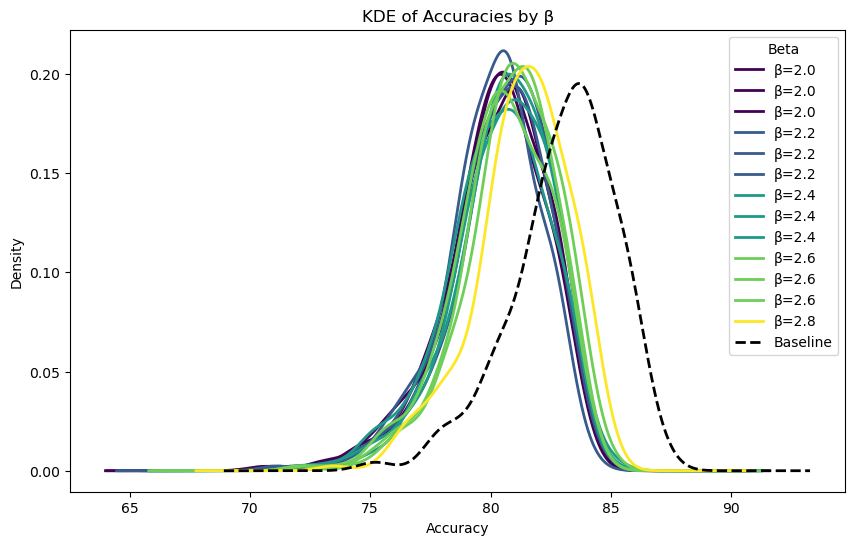

In [33]:
from matplotlib.colors import LogNorm

#df = df_full_2[df_full_2['T'] == 1.0]
#df = df[df['beta'] >= 1.1]
#df = df[df['beta'] != 2.8]
#df = df[df['beta'] != 3.22]
#df = df_full
df = df_all
# normalize beta to [0,1] and pick a colormap
norm = LogNorm(vmin=df['beta'].min(), vmax=df['beta'].max())
cmap = plt.cm.viridis
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df.iterrows():
    print(row['beta'])
    s = pd.Series(row['accuracies'], dtype=float)
    c = cmap(norm(row['beta']))
    s.plot.kde(color=c, bw_method='scott', label=f"β={row['beta']}", linewidth=2, )

s = pd.Series(baseline, dtype=float)
s.plot.kde(color='black', bw_method='scott', label="Baseline", linewidth=2, linestyle='--')

plt.xlabel("Accuracy")
plt.title("KDE of Accuracies by β")
plt.legend(title="Beta")
plt.show()

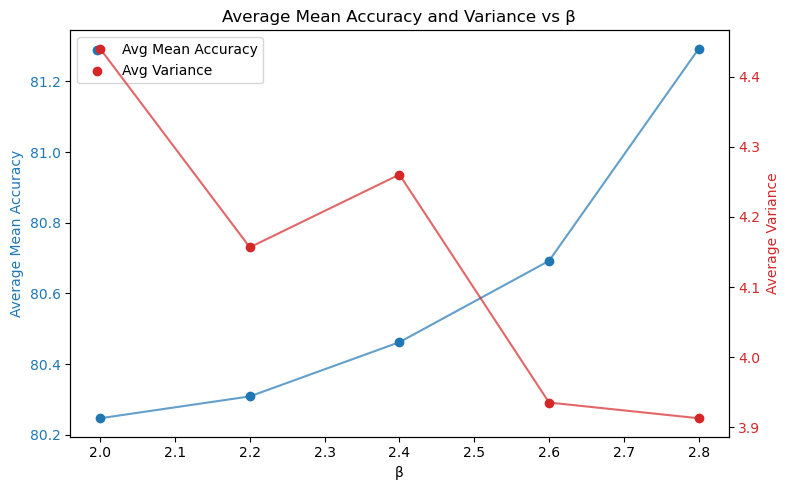

In [34]:
# plot average of mean accuracies and variance for each beta
fig, ax1 = plt.subplots(figsize=(8, 5))

# Group by beta and calculate average mean accuracy and variance
beta_groups = {}
beta_variances = {}
for _, row in df_all.iterrows():
    beta = row['beta']
    if beta not in beta_groups:
        beta_groups[beta] = []
        beta_variances[beta] = []
    beta_groups[beta].append(row['mean_accuracy'])
    beta_variances[beta].append(np.var(row['accuracies']))

betas = []
avg_accuracies = []
avg_variances = []
for beta in beta_groups.keys():
    betas.append(beta)
    avg_accuracies.append(np.mean(beta_groups[beta]))
    avg_variances.append(np.mean(beta_variances[beta]))

# Sort by beta for proper plotting
sorted_indices = np.argsort(betas)
betas = [betas[i] for i in sorted_indices]
avg_accuracies = [avg_accuracies[i] for i in sorted_indices]
avg_variances = [avg_variances[i] for i in sorted_indices]

# Plot mean accuracy
ax1.scatter(betas, avg_accuracies, color='tab:blue', label='Avg Mean Accuracy')
ax1.plot(betas, avg_accuracies, color='tab:blue', linestyle='-', alpha=0.7)
ax1.set_xlabel('β')
ax1.set_ylabel('Average Mean Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for variance
ax2 = ax1.twinx()
ax2.scatter(betas, avg_variances, color='tab:red', label='Avg Variance')
ax2.plot(betas, avg_variances, color='tab:red', linestyle='-', alpha=0.7)
ax2.set_ylabel('Average Variance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.set_title('Average Mean Accuracy and Variance vs β')
fig.tight_layout()
plt.show()

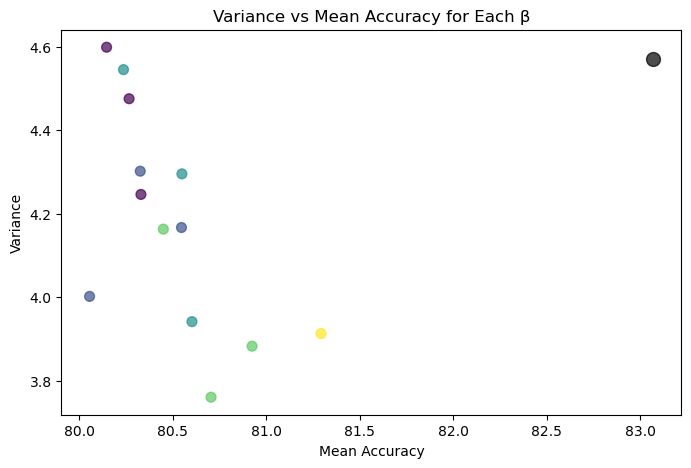

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_all['mean_accuracy'], [ np.var(lst) for lst in df_all['accuracies']], c=df_all['beta'], s=50, alpha=0.7)
ax.scatter(np.mean(baseline), np.var(baseline), color='black', s=100, alpha=0.7, label='Baseline')

ax.set_xlabel('Mean Accuracy')
ax.set_ylabel('Variance')
ax.set_title('Variance vs Mean Accuracy for Each β')

plt.show()

In [36]:
[ np.var(lst) for lst in df_all['accuracies']]

[4.598742802874106,
 4.245996142242797,
 4.4753257859992726,
 4.301712117684724,
 4.001655011225793,
 4.16667581905187,
 4.545050209754812,
 4.2953052141538945,
 3.941157293418952,
 4.162791691745255,
 3.7600692175640233,
 3.882419333975313,
 3.91267402243914]